# 1. Problema de ordenamiento

**Entrada**: Una secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, tal que $a_1'\leq a_2' \leq... \leq a_n'$.

El MergeSort es un algoritmo de ordenamiento conocido por su metodología de divide y vencerás, lo que significa que divide el problema en varios subproblemas más simples para resolver el problema de ordenamiento.

![image](https://i.imgur.com/cJLT1tC.png)



# 2. MergeSort

El siguiente código muestra una implementación del algoritmo **MergeSort**.

## 2.1. Código

In [9]:
import random as rand
from termcolor import colored
import math as mt
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat

In [10]:
def Merge(izq, der, verbose, comps, sorts):
  b = []
  if verbose:
    print("\nInicio Merge...")
    print("Arreglo Izquierdo: ",colored(f"{str(izq)}","red"))
    print("Arreglo Derecho: ",colored(f"{str(der)}","blue"),"\n")
  while True: 
    if len(izq) > 0 and len(der) > 0: # Mientras cualquiera de los arreglos tenga un largo mayor a 0 se mantendra el ciclo infinito.
      if izq[0] < der[0]: # Si el numero de la derecha es mayor que el de la izquierda se ingresa en el nuevo arreglo y se borra del arreglo original.
        comps += 1
        b.append(izq[0])
        izq.pop(0)
      else: # Viceversa
        comps += 1
        b.append(der[0])
        der.pop(0) 
    else:
      break
      
  if len(izq) > 0 :# Como el ciclo cierra al terminar solo uno de los arreglos, lo que sobra del otro arreglo se inserta aqui
    while len(izq) > 0:
      comps += 1
      b.append(izq[0])
      izq.pop(0)
  else:
    while len(der) > 0:
      comps += 1
      b.append(der[0])
      der.pop(0)
      
  if verbose:
    print("Arreglos Combinados:")
    print(b, "\n")
  return b, comps, sorts



def MergeSort(a, comps, sorts, verbose = False):
  if(len(a) == 1): return a, comps, sorts # Si el arreglo recibido es de largo 1, se retorna de inmediato ya que no se puede dividir mas
  mitad = len(a)//2
  izq = a[0:mitad] # Se divide el arreglo en dos arreglos separados
  der = a[mitad:]
  sorts += 1
  if (verbose):
    print("Arreglo Actual:")
    print(colored(f"{str(a)}","green"))
    print("Arreglo Separado:")
    print(colored(f"{str(izq)}","red"),",",colored(f"{str(der)}","blue"))

  izq, comps, sorts = MergeSort(izq, comps, sorts, verbose) # Se llama recursivamente a MergeSort para subdividir el arreglo si es posible
  der, comps, sorts = MergeSort(der, comps, sorts, verbose)

  return Merge(izq, der, verbose, comps, sorts) # Una vez tenemos los arreglos listos, se inicia la funcion merge.

a = [26, 16, 21, 38, 22]
print("Entrada: ", a)
b, comps, sorts = MergeSort(a, 0, 0)
print("Salida: ", b)
print("# Comparaciones: ", comps)
print("# llamadas de MergeSort: ", sorts)


Entrada:  [26, 16, 21, 38, 22]
Salida:  [16, 21, 22, 26, 38]
# Comparaciones:  12
# llamadas de MergeSort:  4


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. Luego, estos se ordenan siguiendo los siguientes pasos:

1. Se divide el arreglo en la mitad $\frac{n}{2}$, dejándonos con dos sub arreglos.

2. Repetir Paso 1 con cada sub arreglo hasta que quedemos con $n$ arreglos de un elemento cada uno.

3. Utilizando la función Merge, se van combinando y ordenando los arreglos hasta que solo queda un arreglo ordenado.

## 2.3. Ejemplo

Por ejemplo, tenemos un arreglo:

$a=[5,3,2,4]$

En la primera pasada dividimos el arreglo en 2 arreglos:

$a_1=[5,3]$, $b_1=[2,4]$

Luego, en la segunda pasada volvemos a dividir ambos arreglos por la mitad, terminando con 4 arreglos de un elemento:

$a_2=[5]$, $b_2=[3]$, $c_2=[2]$, $d_2=[4]$

En la tercera pasada, como tenemos ya los arreglos separados en arreglos de 1, podemos llamar a Merge y comenzar a ordenar y volver a juntar los arreglos:

$a_3=[3,5]$, $b_3=[2,4]$

Se repite Merge hasta que solo quede un arreglo ordenado:

$a=[2,3,4,5]$

Y tenemos un arreglo ordenado.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [11]:
a = rand.sample(range(1, 100), 5)
b, comps, sorts = MergeSort(a, 0, 0, True)
print("# Comparaciones: ", comps)
print("# llamadas a MergeSort: ", sorts)

Arreglo Actual:
[43, 31, 55, 99, 2]
Arreglo Separado:
[43, 31] , [55, 99, 2]
Arreglo Actual:
[43, 31]
Arreglo Separado:
[43] , [31]

Inicio Merge...
Arreglo Izquierdo:  [43]
Arreglo Derecho:  [31] 

Arreglos Combinados:
[31, 43] 

Arreglo Actual:
[55, 99, 2]
Arreglo Separado:
[55] , [99, 2]
Arreglo Actual:
[99, 2]
Arreglo Separado:
[99] , [2]

Inicio Merge...
Arreglo Izquierdo:  [99]
Arreglo Derecho:  [2] 

Arreglos Combinados:
[2, 99] 


Inicio Merge...
Arreglo Izquierdo:  [55]
Arreglo Derecho:  [2, 99] 

Arreglos Combinados:
[2, 55, 99] 


Inicio Merge...
Arreglo Izquierdo:  [31, 43]
Arreglo Derecho:  [2, 55, 99] 

Arreglos Combinados:
[2, 31, 43, 55, 99] 

# Comparaciones:  12
# llamadas a MergeSort:  4


En cada iteración, los arreglos destacados en verde son los arreglos de entrada a MergeSort, los arreglos en rojo son el arreglo izquierdo y los azules los derechos.

Al finalizar un Merge, recibimos los arreglos con los que se entró al Merge, ordenados en un solo arreglo.

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El **MergeSort** tiene un **tiempo de ejecución de** $O(n log (n))$ en **todos** los casos.*

### **Arbol de recurrencia**

Para calcular el tiempo de ejecución del MergeSort, debemos recordar que este se basa en la metodología divide y vencerás, entonces tenemos que tener en cuenta 2 cosas:
1. En cada iteracion el problema se va a dicidir en dos (n\2)
2. La suma de cada nivel es igual a n.

Ahora tenemos que tomar en cuenta que $T(n)=O(nlog(n))$, siendo esto lo que nos quedaria si multiplicamos la altura con la cantidad de datos.
En la siguiente imagen se muestra el arbol de recurrencia $T(n) = 2T(\frac{n}{2})+cn$:

![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

En la imagen podemos observar como el árbol se expande progresivamente. Posee $log_2n$ niveles y cada nivel tiene un costo $cn$. Con esto podemos decir que el total sería $cn log_2$, lo cual intrepretamos como $O(n log (n))$

### **Comprobación con código**
Ahora que sabemos como funciona el algoritmo, podemos comprobar si nuestro teorema esta correcto al ejecutar el código previamente escrito para el MergeSort en un rango de valores para que veamos que nuestro teorema esta correcto.

In [12]:
for n in range(1,20):
  a = rand.sample(range(1, 100), n)
  a, comps, sorts = MergeSort(a, 0, 0)

  log = n * mt.log2(n) # Caso general de MergeSort
  print("Caso",n,":",a)
  print("Comparaciones/Divisiones =", comps, ", n(log2(n)) =", log // 1, "\n")


Caso 1 : [85]
Comparaciones/Divisiones = 0 , n(log2(n)) = 0.0 

Caso 2 : [34, 84]
Comparaciones/Divisiones = 2 , n(log2(n)) = 2.0 

Caso 3 : [15, 57, 76]
Comparaciones/Divisiones = 5 , n(log2(n)) = 4.0 

Caso 4 : [28, 38, 41, 92]
Comparaciones/Divisiones = 8 , n(log2(n)) = 8.0 

Caso 5 : [25, 37, 66, 69, 86]
Comparaciones/Divisiones = 12 , n(log2(n)) = 11.0 

Caso 6 : [13, 22, 53, 68, 89, 92]
Comparaciones/Divisiones = 16 , n(log2(n)) = 15.0 

Caso 7 : [7, 18, 23, 67, 85, 87, 92]
Comparaciones/Divisiones = 20 , n(log2(n)) = 19.0 

Caso 8 : [1, 22, 24, 27, 28, 31, 78, 87]
Comparaciones/Divisiones = 24 , n(log2(n)) = 24.0 

Caso 9 : [2, 9, 18, 19, 21, 32, 43, 54, 95]
Comparaciones/Divisiones = 29 , n(log2(n)) = 28.0 

Caso 10 : [3, 20, 34, 46, 48, 65, 68, 78, 84, 90]
Comparaciones/Divisiones = 34 , n(log2(n)) = 33.0 

Caso 11 : [6, 15, 22, 23, 25, 40, 44, 47, 52, 58, 71]
Comparaciones/Divisiones = 39 , n(log2(n)) = 38.0 

Caso 12 : [13, 14, 17, 19, 26, 55, 57, 63, 66, 69, 93, 96]
Compara

# 4. Correctitud

### **Teorema (Correctitud)**

*El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del Teorema

Previamente observamos que en cada llamada del `MergeSort` subdividimos el arreglo hasta obtener $n$ arreglos de tamaño 1, y después con la función `Merge` volvemos a juntar y a ordenar los arreglos.

Por lo tanto, probaremos la correctitud de la función `MergeSort` utilizando inducción matemática, y la correctitud de la función `Merge` con la propiedad del bucle invariante.

# Prueba del teorema (Merge)

La función Merge recibe dos arreglos, los cuales ordenara dentro de un nuevo arreglo.

Esto lo logra comparando ambos arreglos, insertando el menor valor entre ambos arreglos a un nuevo arreglo ordenado.

Para probar su correctitud con la propiedad del bucle invariante, primero debemos analizar la inicialización del bucle ($i = 0$ y $j = 0$), y comprobar si se mantiene durante la ejecución de este.

> Al comienzo de cada iteración $i$ y $j$ del bucle, siendo $i$ el índice del primer arreglo y $j$ el índice del segundo arreglo, el arreglo resultante debe estar ordenado de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración ($i = 0 y $j = 0$), los primeros $i+j$ elementos del arreglo nuevo ya se encuentran ordenados. Esto es trivialmente cierto, siendo que estamos considerando un solo elemento.

**Mantención**

Al comienzo de cada iteración $i$ y $j$ 
se cumple la propiedad, o sea los primeros elementos del arreglo resultante ya se encuentran ordenados de menor a mayor.

Consideremos a $y$ como el menor elemento y a $x$ como mayor (como se muestra en la figura)

![image](https://i.imgur.com/eAydZyR.png)

Durante el bucle de la función Merge, el menor dato ($y$) será insertado al final del arreglo ordenado.

![image](https://i.imgur.com/IeQKsqI.png)

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la **propiedad invariante**.

![image](https://i.imgur.com/CVvbdqM.png)

# Prueba del teorema (MergeSort)
Como destacamos previamente, utilizaremos inducción matemática para probar la correctitud de la función MergeSort. Para probar una declaración $P(n)$ en inducción matemática, para todos los números naturales $n$ debemos seguir los siguientes pasos:

1.   Probar $P(n)$ con un caso base, en nuestro caso $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, de tal forma que para $P(n)$ esto también esté correcto.

En nuestro caso base $P(1)$, como MergeSort recibirá un arreglo de largo 1, la función lo considera como ya ordenado, entonces se cumple $P(1)$.

Para el segundo caso, recordamos que MergeSort recibe un arreglo de largo $n$ y lo subdivide en subarreglos de tamaño $m = \frac{n}{2}$ hasta llegar a $n$ arreglos de largo 1 para comenzar a volver a juntar y ordenar los arreglos con la función Merge, a la cual ya le comprobamos su correctitud previamente.



# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones del peor caso calculadas matemáticamente
* Cantidad de comparaciones del mejor caso calculadas matemáticamente
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

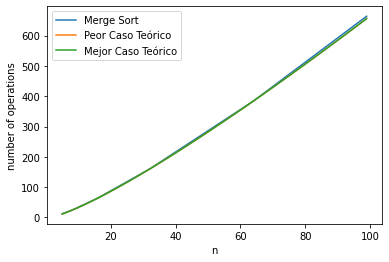

In [13]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)] 
y1=[n * mt.log2(n) for n in range(5,100)] # worst case
y2=[n * mt.log2(n) for n in range(5,100)] # best case
y=[]; 

for n in range(5,100):
  a = rand.sample(range(1, 100), n)
  a, counter, sorts = MergeSort(a, 0, 0)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Merge Sort", "Peor Caso Teórico", "Mejor Caso Teórico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

Como habiamos discutido en una seccion previa, los casos de ejecucion del MergeSort no varian, entonces ambos su mejor y peor caso son $O(n log(n))$.

En el gráfico se puede apreciar que, como cabía de esperar, el tiempo de ejecucion del MergeSort no varia de $n(log(n))$.

## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **MergeSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños $n \in [5,500]$, y se compara al mismo tiempo del algoritmo **InsertionSort**.

# Codigo InsertionSort


In [14]:
def insertionSort(a, verbose=False):
    comps = 0
    movs = 0
    chk = False
    for i in range(1, len(a)):
        if verbose == True: 
            print("\nIndice actual", i)
            if (i < len(a)-1): print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"),",",str(a[i+1:])[1:-1])
            else: print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"))

        pos = a[i] # Variable que guarda el indice a mover
        j = i-1

        while j >= 0 and pos < a[j]:
            if verbose == True: print("\nIndice anterior menor al actual.\nMoviendo posicion a indice", j)
            if chk == False: 
                movs += i
                chk = True
            comps += 1 # Esto cuenta como una comparacion
            a[j+1] = a[j] # Se cambia el valor del indice actual por el anterior a este
            j -= 1 # Se baja un indice
            if verbose == True: print(a)
        chk = False
        a[j+1] = pos # El indice previamente guardado se vuelve a introducir al arreglo

        if verbose == True: 
            print("\nDespues de la pasada:")
            print(a)
            print("\n")
    if verbose == True:
        print("Movimientos =", movs)
        print("Retrocesos Promedio =", (movs/comps))
    return a, comps

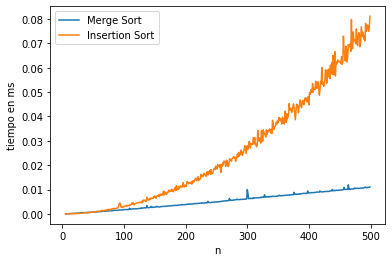

In [15]:
x=[]; y=[]

for n in range(5,500):

  a = rand.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a}, 0, 0)", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)

x=[]; y=[]

for n in range(5,500):

  a = rand.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["Merge Sort", "Insertion Sort"])

plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()

### Análisis de resultados

En el gráfico podemos inmediatamente darnos cuenta de que el MergeSort es drasticamente mas rapido que el InsertionSort, manteniendo una velocidad semi constante a diferencia de la velocidad cada vez mas lenta del InsertionSort.

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.